In [2]:
pip install python-bidi


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install hazm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
# data analysis pkg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

# data wrangling, cleaning and wordcloud visualization pkg
from hazm import word_tokenize, stopwords_list, InformalLemmatizer
import re
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud

from tqdm import tqdm as progressbar

# Avoiding warnings
import warnings
import os
########### Prevent Warnings ###########
warnings.filterwarnings(action='ignore')
########### Prevent Warnings ###########

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.title = df.title.astype('str')
# df.text = df.text.astype('str')
df.comment = df.comment.astype('str')
df.rate = df.rate.astype('int')

In [3]:
df.head()

,id,title,comment,rate,verification_status
0,0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,100,0
1,1,شش ماه مصرف!!,دوبار از این مدل گرفتم اولاش خوبه ولی بعد از ش...,5,0
2,2,کارآیی,به نظر من فقط برای کارای سبک و دیدن فیلم و مطا...,60,0
3,3,بررسی کمی و کیفی,برای من بسیار مناسب و خریدش در شگفت انگیز حتما...,0,0
4,4,بسته بندی ضعیف,ظاهر بامزه ای داره ولی عکسش شبیه خودش نیست جنس...,60,0


In [4]:
df.id.nunique()

180000

In [5]:
df.isnull().sum()

id                     0
title                  0
comment                0
rate                   0
verification_status    0
dtype: int64

In [6]:
df = df.drop('verification_status', 1)
df.rate = np.where(df.rate > 50, 1, 0)

In [7]:
df.head()

,id,title,comment,rate
0,0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,1
1,1,شش ماه مصرف!!,دوبار از این مدل گرفتم اولاش خوبه ولی بعد از ش...,0
2,2,کارآیی,به نظر من فقط برای کارای سبک و دیدن فیلم و مطا...,1
3,3,بررسی کمی و کیفی,برای من بسیار مناسب و خریدش در شگفت انگیز حتما...,0
4,4,بسته بندی ضعیف,ظاهر بامزه ای داره ولی عکسش شبیه خودش نیست جنس...,1


In [8]:
df = df[~((df.title.isnull()) & (df.comment.isnull()))]
df = df.reset_index(drop=True)

In [9]:
df.dtypes

id          int64
title      object
comment    object
rate        int32
dtype: object

In [10]:
df['text'] = df['title'] + ' ' + df['comment']
# swap text and target values
# And also exclude id colmn => No longer is needed
df = df.reindex(columns=['title', 'comment', 'text', 'rate'])
df.head(1)
# df = df.drop('title', 1)
# df = df.drop('comment', 1)

,title,comment,text,rate
0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,کیفیت و حجم صدای عااااالی این محصول توی بازار ...,1


In [11]:
def set_types(df):
    df.title = df.title.astype(str)
    df.comment = df.comment.astype(str)
    df.text = df.text.astype(str)

    df.rate = df.rate.astype('int')
    return df
df = set_types(df)

In [12]:
df.dtypes

title      object
comment    object
text       object
rate        int32
dtype: object

In [13]:
def replace_nan(entry):
    if entry == 'nan':
        return '#'
    return entry
df.title = df.title.apply(replace_nan)
df.comment = df.comment.apply(replace_nan)
df.text = df.text.apply(replace_nan)

In [14]:
# df['text'] = df['title'] + ' ' + df['comment']
# # swap text and target values
# # And also exclude id colmn => No longer is needed
# df = df.reindex(columns=['title', 'comment', 'text', 'rate'])
# df.head(1)

In [15]:
df.head()

,title,comment,text,rate
0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,کیفیت و حجم صدای عااااالی این محصول توی بازار ...,1
1,شش ماه مصرف!!,دوبار از این مدل گرفتم اولاش خوبه ولی بعد از ش...,شش ماه مصرف!! دوبار از این مدل گرفتم اولاش خوب...,0
2,کارآیی,به نظر من فقط برای کارای سبک و دیدن فیلم و مطا...,کارآیی به نظر من فقط برای کارای سبک و دیدن فیل...,1
3,بررسی کمی و کیفی,برای من بسیار مناسب و خریدش در شگفت انگیز حتما...,بررسی کمی و کیفی برای من بسیار مناسب و خریدش د...,0
4,بسته بندی ضعیف,ظاهر بامزه ای داره ولی عکسش شبیه خودش نیست جنس...,بسته بندی ضعیف ظاهر بامزه ای داره ولی عکسش شبی...,1


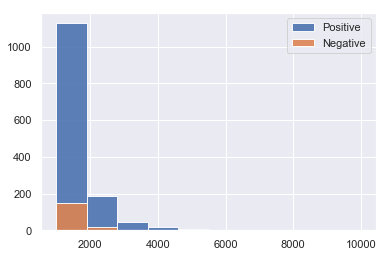

In [16]:
# length between [1000-10000]

plt.hist(df[df['rate']==1].text.str.len(),alpha=0.9, range=(1000, 10000))
plt.hist(df[df['rate']==0].text.str.len(),alpha=0.9, range=(1000, 10000))
plt.legend(('Positive', 'Negative'))

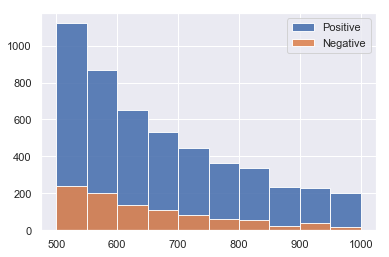

In [17]:
# length between [500-1000]
plt.hist(df[df['rate']==1].text.str.len(),alpha=0.9, range=(500, 1000))
plt.hist(df[df['rate']==0].text.str.len(),alpha=0.9, range=(500, 1000))
plt.legend(('Positive', 'Negative'))

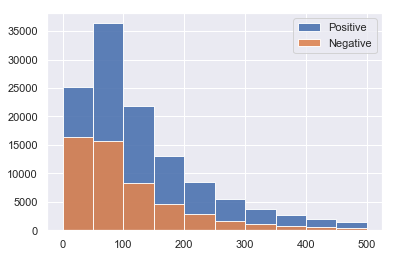

In [18]:
# length between [0-500]
# Can set cumulative to true, to see the cumulative plot
plt.hist(df[df['rate']==1].text.str.len(),alpha=0.9, range=(0, 500))
plt.hist(df[df['rate']==0].text.str.len(),alpha=0.9, range=(0, 500))
plt.legend(('Positive', 'Negative'))

In [19]:
df.text.groupby(pd.cut(df.text.str.len(), np.arange(0,10000,500))).count()

text
(0, 500]        172518
(500, 1000]       5920
(1000, 1500]      1011
(1500, 2000]       297
(2000, 2500]       129
(2500, 3000]        59
(3000, 3500]        25
(3500, 4000]        13
(4000, 4500]         9
(4500, 5000]         7
(5000, 5500]         3
(5500, 6000]         2
(6000, 6500]         1
(6500, 7000]         2
(7000, 7500]         2
(7500, 8000]         0
(8000, 8500]         1
(8500, 9000]         0
(9000, 9500]         1
Name: text, dtype: int64

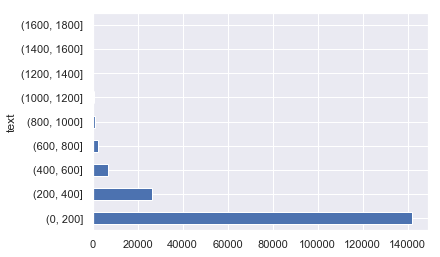

In [20]:
df.text.groupby(pd.cut(df.text.str.len(), np.arange(0,2000,200))).count().\
plot(kind='barh')

In [21]:
# Who's the longest?
df[df.text.str.len() == max(df.text.str.len())]

,title,comment,text,rate
174280,اگه تو خریدش دو دل هستید حتما بخونید...,ببینید دوستان من به عنوان یک گوشی باز حرفه ای ...,اگه تو خریدش دو دل هستید حتما بخونید... ببینید...,1


In [22]:
df = df[df.text.str.len()<=2000]
df = df.reset_index(drop=True)
df.shape

(179746, 4)

In [23]:
df[(df.duplicated(subset=['text']))].count()

title      651
comment    651
text       651
rate       651
dtype: int64

In [24]:
df.drop_duplicates(subset =['text'], inplace = True)

In [25]:
lemma = InformalLemmatizer()

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py  emoticons list
# https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt Chat shortcuts

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r' ', text)

def remove_punctuations(text):
    punctuations = re.compile(r'[~`!@#$%^&*(,<،>){}\\/|\'"?؟_+-=~\[\]]')
    return punctuations.sub(r' ', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', text)

def remove_weird_chars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               u"nan"

                               "]+", flags=re.UNICODE)
    patterns = [re.compile('\r'), re.compile('\n'), re.compile('&amp;')]
    text = weridPatterns.sub(r'', text)
    for p in patterns:
        text = p.sub(r' ', text)
    return text

def remove_extra_repeated_alpha(text):
    """
    Remove extra repeated alphabets in a word
    check these links:
    demo : https://regex101.com/r/ALxocA/1
    Question: https://bit.ly/2DoiPqS
    """
    return re.sub(r'([^\W\d_])\1{2,}', r'\1', text)


def clean_up(text, url=True, html=True, weird_patterns=True , lemmatize=False, 
               stopwords=True, isalpha=False, punctuations=True, remove_extra_alpha=True):
    # remove url
    if url:
        text = remove_urls(text)
    # remove html tags
    if html:
        text = remove_html(text)
    # remove emokis / symbols & pictographs / transport & map symbols / flags (iOS)
    if weird_patterns:
        text = remove_weird_chars(text)
    # remove punctuations
    if punctuations:
        text = remove_punctuations(text)
    # Alter words with repeated alphabets
    if remove_extra_repeated_alpha:
        text = remove_extra_repeated_alpha(text)
    # tokenize text
    tokens = word_tokenize(text)
    # remove stop words
    if stopwords:
        tokens = [word for word in tokens if word not in stopwords_list()]
    # remove non-alphabetic items
    if isalpha:
        tokens = [word for word in tokens if word.isalpha()]
    # lemmatize words
    if lemmatize:
        tokens = [lemma.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    
    return text

# df[df.comment.str.len()>4000].head(10)
# a = df.iloc[60659].comment
# a
# preprocess(str(a))


In [26]:
df[df.text.str.len() > 1900].head()

,title,comment,text,rate
2411,بسته به نیازتون خرید کنید,خب بعد از استفاده یه ماهه از این محصول نظر میز...,بسته به نیازتون خرید کنید خب بعد از استفاده یه...,1
6351,یک پکیج کامل از باگ ها و نقص ها و ایرادات نرم ...,با سلام خدمت دوستای گلم\nاقا اگه از اون دسته ا...,یک پکیج کامل از باگ ها و نقص ها و ایرادات نرم ...,1
6394,نکات قابل توجه در نگهداری از این موتور,سلام دوستان می خوام یه سری از نکات فنی رو در ر...,نکات قابل توجه در نگهداری از این موتور سلام دو...,1
11747,عالیه,من این لپتاپ رو دقیقا با این مشخصات از نمایندگ...,عالیه من این لپتاپ رو دقیقا با این مشخصات از ن...,1
11795,یکی از بهترین ها,با سلام خدمت همگی.این نطری که به اشتراک میذارم...,یکی از بهترین ها با سلام خدمت همگی.این نطری که...,1


In [27]:
a = df.loc[1000].text
a

'nan مشابه این محصول رو خواهرم خریده بود و وقتی کارایی اش رو دیدم که هم سبکه هم نرمه و هم تعداد خوبی از لباس درونش جا می شه و راحت حمل می شه برای لباسهایی که از ماشین لباسشویی در میارین و میخواین تا بند رخت ببرین.\nمن رنگ صورتیش رو گرفتم که خیلی خوشگله و یه صورتی کم رنگ قشنگه و جنس خوبی هم داره.به نظر من با این قیمت می ارزه و کاربردیه'

In [28]:
clean_up(a)

'مشابه محصول خواهرم خریده_بود کارایی دیدم سبکه نرمه لباس درونش شه راحت حمل شه لباسهایی ماشین لباسشویی میارین میخواین بند رخت ببرین رنگ صورتیش گرفتم خوشگله یه صورتی رنگ قشنگه جنس داره قیمت ارزه کاربردیه'

In [29]:
# df.title = clean_up(str(df.title))

In [30]:
df.head(10)

,title,comment,text,rate
0,کیفیت و حجم صدای عااااالی,این محصول توی بازار اصلاااا پیدا نمیشه من کل ت...,کیفیت و حجم صدای عااااالی این محصول توی بازار ...,1
1,شش ماه مصرف!!,دوبار از این مدل گرفتم اولاش خوبه ولی بعد از ش...,شش ماه مصرف!! دوبار از این مدل گرفتم اولاش خوب...,0
2,کارآیی,به نظر من فقط برای کارای سبک و دیدن فیلم و مطا...,کارآیی به نظر من فقط برای کارای سبک و دیدن فیل...,1
3,بررسی کمی و کیفی,برای من بسیار مناسب و خریدش در شگفت انگیز حتما...,بررسی کمی و کیفی برای من بسیار مناسب و خریدش د...,0
4,بسته بندی ضعیف,ظاهر بامزه ای داره ولی عکسش شبیه خودش نیست جنس...,بسته بندی ضعیف ظاهر بامزه ای داره ولی عکسش شبی...,1
5,تیم نرم افزاری گیلاس gilasweb.ir,من برنامه نویس هستم و راحتی و دقت در کار زیاد ...,تیم نرم افزاری گیلاس gilasweb.ir من برنامه نوی...,0
6,نسبت به قیمت خوبه,خوبه نسبت به قیمت شگفت انگیزش,نسبت به قیمت خوبه خوبه نسبت به قیمت شگفت انگیزش,0
7,کیف شیک,از خریدم راضیم خیلی شیکه هر کی دیده پرسیده از ...,کیف شیک از خریدم راضیم خیلی شیکه هر کی دیده پر...,1
8,بسیار بی کیفیت,محصول بشدت بی کیفیتی میباشد,بسیار بی کیفیت محصول بشدت بی کیفیتی میباشد,0
9,با این قیمت خوبه,کیفیت بالایی نداره.فقط کار راه بندلزه,با این قیمت خوبه کیفیت بالایی نداره.فقط کار را...,0


In [31]:
for index, row in progressbar(df.iterrows(), total=df.shape[0]):
    row = row.copy()
    comment = clean_up(row.comment)
    title = clean_up(row.title)
    text = clean_up(row.text)
    df.loc[index, 'title'] = title
    df.loc[index, 'comment'] = comment
    df.loc[index, 'text'] = text

# Save preprocessed data
df.to_csv('data_test.csv', index=False)

100%|████████████████████████████████████████████████████████████████████████| 179095/179095 [4:24:50<00:00, 11.27it/s]


In [32]:
# read preprocessed data 
df = pd.read_csv('data_test.csv')

In [33]:
df = set_types(df)
df.text = df.text.apply(str)

In [34]:
all_words_title = ' '.join([text for text in df.title])
all_words = arabic_reshaper.reshape(all_words_title)

In [35]:
all_words = get_display(all_words)

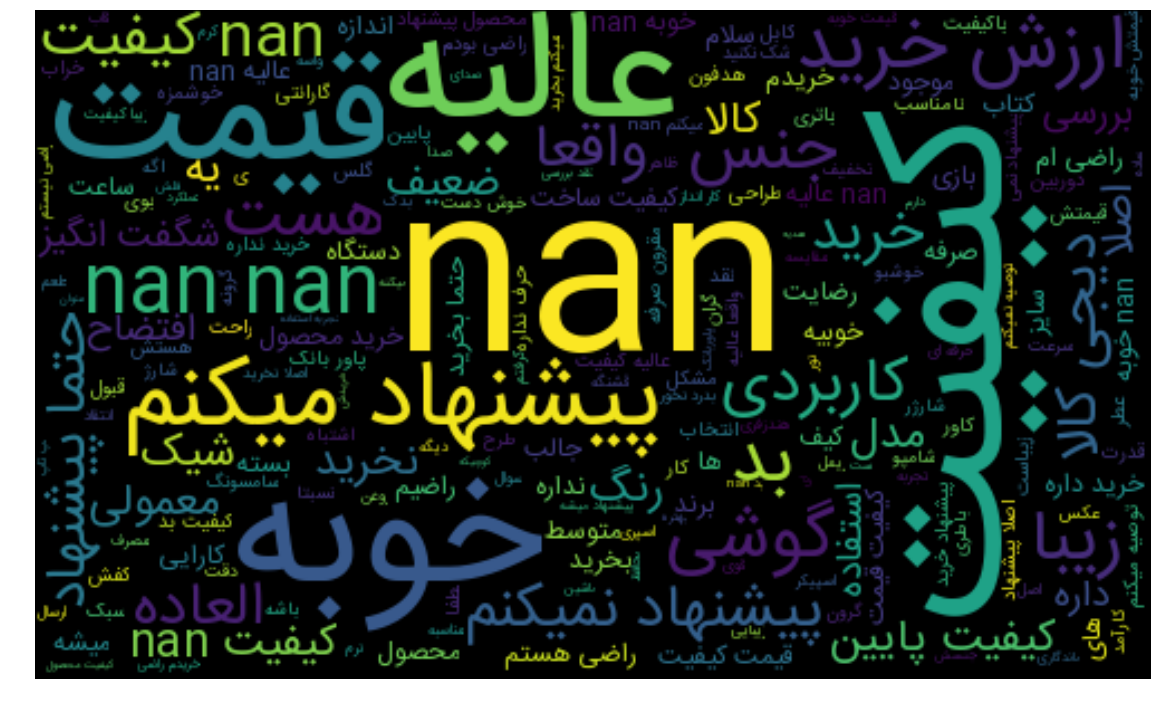

In [38]:
# https://stackoverflow.com/questions/49384111/reflect-arabic-word-cloud
wordcloud = WordCloud(font_path="iranian_sans.ttf", 
                      width=500, height=300, 
                      random_state=41, max_font_size=100).generate(all_words) 
plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [39]:
all_words_comment = ' '.join([text for text in df.comment])
all_words = arabic_reshaper.reshape(all_words_comment)

In [40]:
all_words = get_display(all_words)

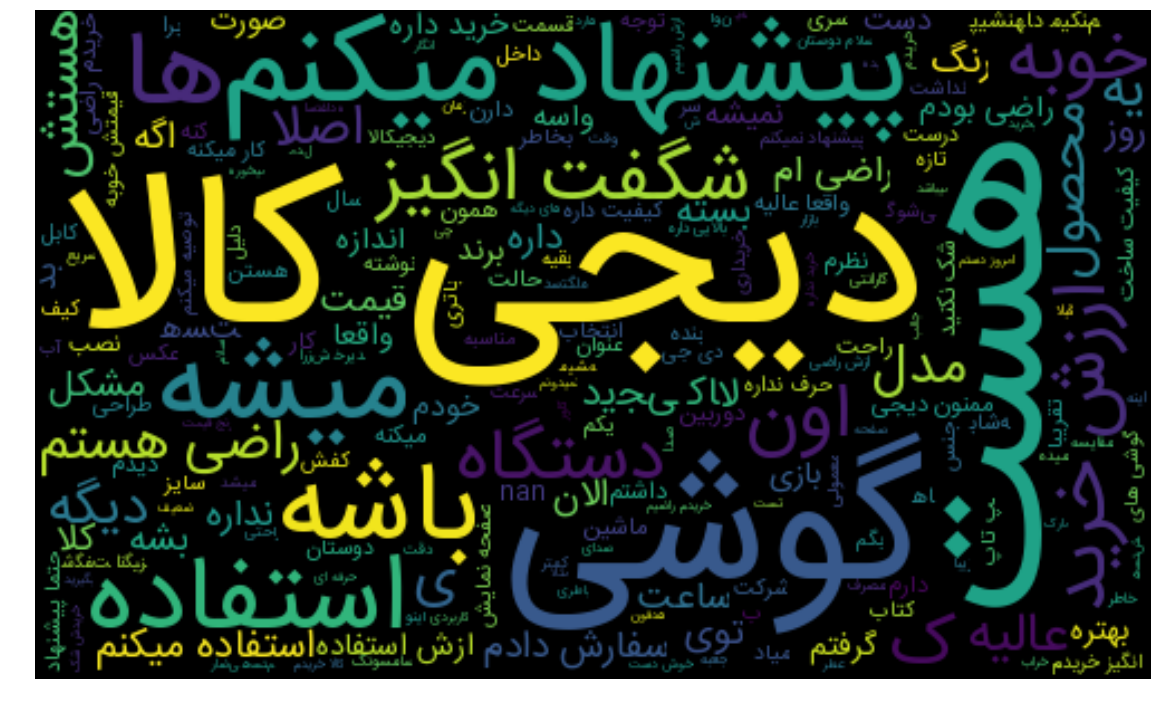

In [41]:
wordcloud = WordCloud(font_path="iranian_sans.ttf", 
                      width=500, height=300, 
                      random_state=41, max_font_size=100).generate(all_words) 
plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [42]:
all_words_comment = ' '.join([text for text in df[df.rate == 1].comment])
all_words = arabic_reshaper.reshape(all_words_comment)

In [43]:
all_words = get_display(all_words)

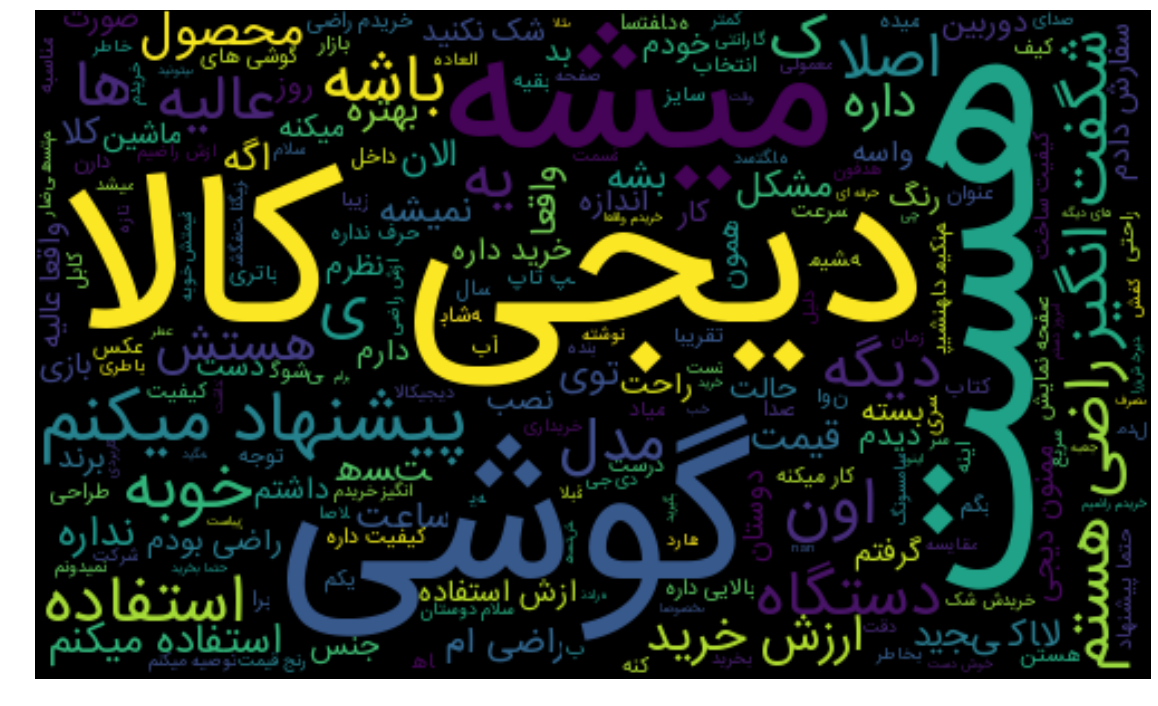

In [44]:
wordcloud = WordCloud(font_path="iranian_sans.ttf", 
                      width=500, height=300, 
                      random_state=41, max_font_size=100).generate(all_words) 
plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [45]:
all_words_comment = ' '.join([text for text in df[df.rate ==0].comment])
all_words = arabic_reshaper.reshape(all_words_comment)

In [46]:
all_words = get_display(all_words)

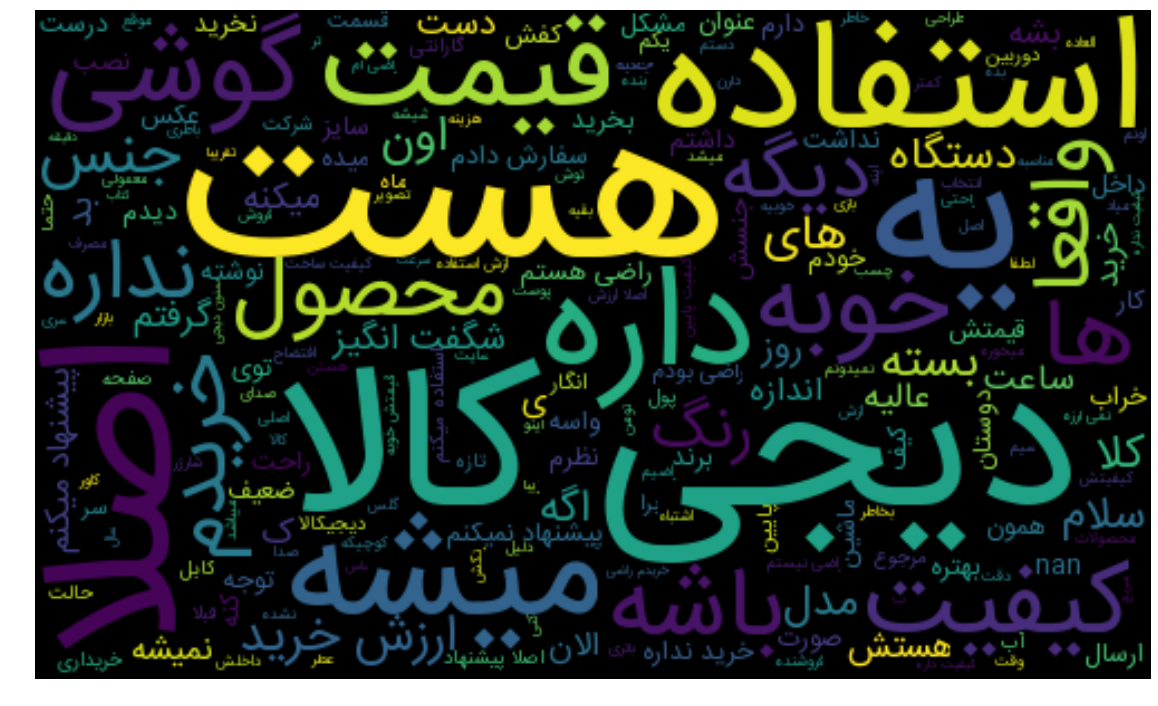

In [47]:
wordcloud = WordCloud(font_path="iranian_sans.ttf", 
                      width=500, height=300, 
                      random_state=41, max_font_size=100).generate(all_words) 
plt.figure(figsize=(20, 15)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()